# 簡単な線形回帰モデル(単回帰モデル)


### テーマ：　勤続年数によって残業時間はどの程度増えるか、もしくは減るか

< データの情報 >
- ID: 社員ID
- section: 所属部署
- tenure: 勤続年数
- overtime: 残業時間

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('data/StaffOvertime.csv')
df.head()

,ID,section,tenure,overtime
0,10012,Admin,35,34.2
1,10015,IT,34,42.9
2,10019,IT,34,38.1
3,10020,Admin,33,34.7
4,10022,Admin,33,37.3


In [3]:
# カラム名（列名）を表示
df.columns

Index(['ID', 'section', 'tenure', 'overtime'], dtype='object')

In [4]:
# 量的変数の要約統計量を算出
df.describe()

,ID,tenure,overtime
count,325.000000,325.000000,325.000000
mean,13727.175385,14.664615,25.542769
std,4574.771200,8.414135,10.911688
min,10012.000000,1.000000,1.200000
25%,12050.000000,8.000000,17.300000
50%,12135.000000,13.000000,25.900000
75%,12319.000000,20.000000,33.100000
max,29556.000000,35.000000,53.700000


In [5]:
# カテゴリ変数のユニークな要素の個数
df['section'].value_counts()

IT       120
Sales    104
Admin    101
Name: section, dtype: int64

In [6]:
# データ型を確認
df.dtypes

ID            int64
section      object
tenure        int64
overtime    float64
dtype: object

<AxesSubplot:xlabel='tenure', ylabel='Count'>

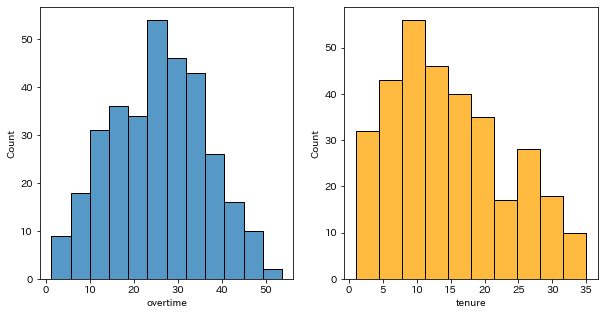

In [7]:
# 今回の目的変数、説明変数についてそれぞれヒストグラムを描画する
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['overtime'], ax=ax[0])
sns.histplot(df['tenure'], ax=ax[1], color='orange')

Text(0, 0.5, '残業時間')

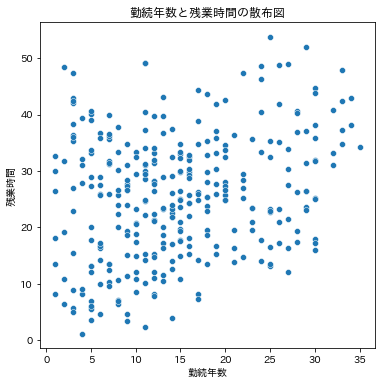

In [8]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['tenure'], y=df['overtime'])
plt.title('勤続年数と残業時間の散布図')
plt.xlabel('勤続年数')
plt.ylabel('残業時間')

## 単回帰モデルの式
$$
y = b_0 + b_1 x　 (ただし、yは残業時間、xを勤続年数とする)
$$

In [9]:
# 今回は、sklearnを利用する（statsmodelでも可）
lr = LinearRegression()

# 今回は全てのデータを使う(本来はNG)
x = df[['tenure']]
y = df['overtime']

lr.fit(x, y)

LinearRegression()

In [10]:
# 学習したモデルの情報を表示
display(f'回帰係数：{lr.coef_[0]}')
display(f'切片：{lr.intercept_}')

display(f'決定係数：{lr.score(x, y)}')

'回帰係数：0.3512209533636109'

'切片：20.392249034673938'

'決定係数：0.07334929118074629'

In [11]:
# 学習したモデルに説明変数をいれ、予測値を算出
pred_y = lr.predict(x)

Text(0, 0.5, '残業時間')

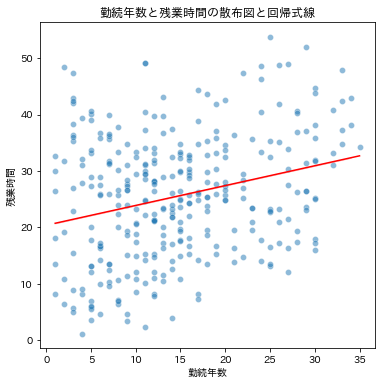

In [12]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['tenure'], y=df['overtime'], alpha=0.5)
sns.lineplot(x=df['tenure'], y=pred_y, color='red')

plt.title('勤続年数と残業時間の散布図と回帰式線')
plt.xlabel('勤続年数')
plt.ylabel('残業時間')